In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Example 1: Forward Complete System - Damped Nonlinear Oscillator
The system:
$$
\dot{x}_1 = x_2, \quad \dot{x}_2 = -x_1 - x_2^3
$$
This system is forward complete because the damping term \( -x_2^3 \) ensures that trajectories eventually settle down and do not grow unbounded.


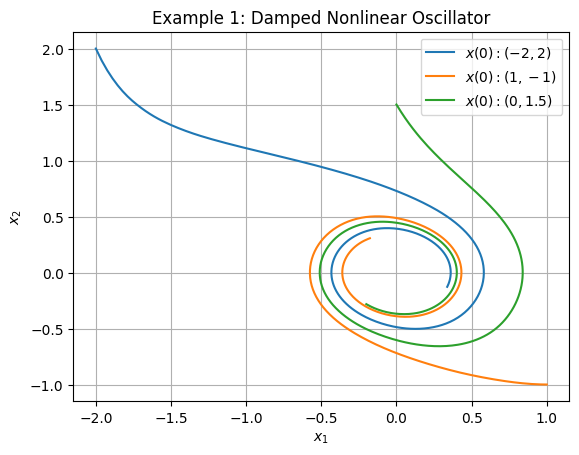

In [2]:
# Example 1: Damped Nonlinear Oscillator
def damped_oscillator(t, z):
    x1, x2 = z
    dx1 = x2
    dx2 = -x1 - x2**3
    return [dx1, dx2]

# Time span and initial conditions
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Initial conditions for plotting
init_conditions = [(-2, 2), (1, -1), (0, 1.5)]

for x1_0, x2_0 in init_conditions:
    sol = solve_ivp(damped_oscillator, t_span, [x1_0, x2_0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=rf"$x(0): ({x1_0}, {x2_0})$")

plt.title("Example 1: Damped Nonlinear Oscillator")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.legend()
plt.show()


### Example 2: Nonlinear Growth with Saturation
The system:
$$
\dot{x}_1 = x_1 - \frac{x_1^3}{1 + x_1^2}
$$
This system is forward complete because the nonlinear saturation term $ -\frac{x_1^3}{1 + x_1^2} $ limits growth for large $ x_1 $, stabilizing the trajectory.

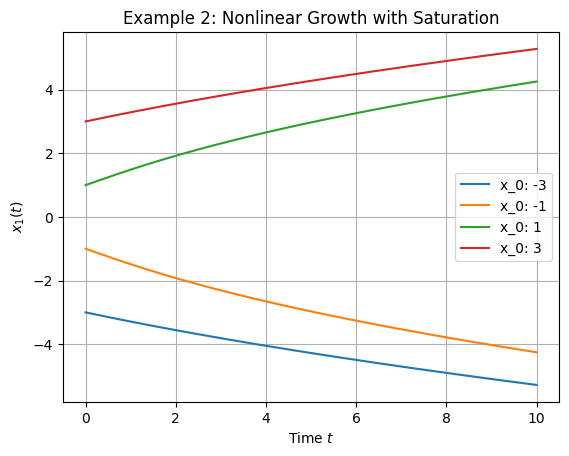

In [3]:
def nonlinear_saturation(t, x):
    return [x[0] - (x[0]**3) / (1 + x[0]**2)]

# t_span = (0, 10)
# t_eval = np.linspace(*t_span, 500)

t = np.linspace(0, 10, 500)


init_conditions = [-3, -1, 1, 3]

for x0 in init_conditions:
    sol = solve_ivp(nonlinear_saturation, [t[0], t[-1]], [x0], t_eval=t)
    plt.plot(t_eval, sol.y[0], label=f"x_0: {x0}")

plt.title("Example 2: Nonlinear Growth with Saturation")
plt.xlabel("Time $t$")
plt.ylabel("$x_1(t)$")
plt.grid()
plt.legend()
plt.show()


### Example 3: Finite-Time Escape
The system:
$$
\dot{x}_1 = x_1^2
$$
This system is **not forward complete** because solutions can escape to infinity in finite time. For example, starting with \( x_1(0) > 0 \), the solution to this differential equation is:
$$
x_1(t) = \frac{1}{\frac{1}{x_1(0)} - t},
$$
which blows up at $ t = \frac{1}{x_1(0)} $.

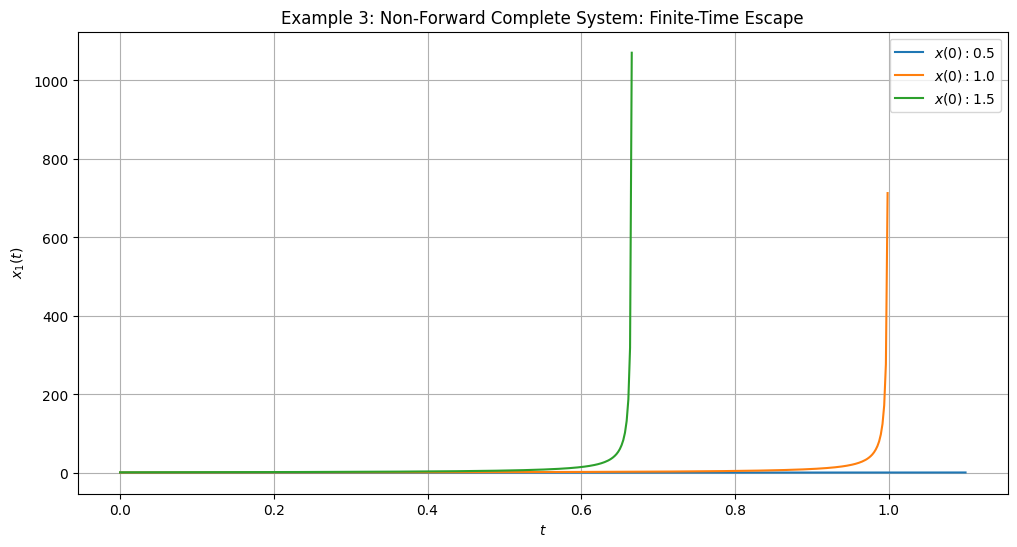

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def finite_time_escape(t, x):
    return [x[0]**2]

t_span = (0, 1.1)  # Going slightly beyond potential blow-up time
t_eval = np.linspace(*t_span, 500)

init_conditions = [0.5, 1.0, 1.5]  # Different initial conditions

# Plot
plt.figure(figsize=(12, 6))
for x0 in init_conditions:
    try:
        sol = solve_ivp(finite_time_escape, t_span, [x0], t_eval=t_eval, max_step=0.01)
        plt.plot(sol.t, sol.y[0], label=rf"$x(0): {x0}$")
    except RuntimeError:
        print(f"Solution blew up for initial condition: {x0}")

plt.title("Example 3: Non-Forward Complete System: Finite-Time Escape")
plt.xlabel("$t$")
plt.ylabel("$x_1(t)$")
plt.grid()
plt.legend()
# plt.ylim(-1, 10)  # Focus on behavior before blow-up
plt.show()